## Как подгрузить модель?

Модель основана на предобученных модельках <a href="https://github.com/kenshohara/3D-ResNets-PyTorch">отсюда</a>

1. Склонировать репозиторий и переместить к себе в папку модуль *models* (используется для генерации архитектуры модели)

`!git clone https://github.com/kenshohara/3D-ResNets-PyTorch`

`!mv 3D-ResNets-PyTorch/models .`

2. Скачать модельки из <a href="https://drive.google.com/drive/folders/1xbYbZ7rpyjftI_KCk6YuL-XrfQDz7Yd4">гугл-папки авторов</a>

3. Запустить файл `wandb_config.py` для тренировки модели

In [ ]:
! python3 wandb_config.py

## Визуализируем входные данные

In [1]:
from datasets import prepare_data

In [2]:
# get data as torch.utils.data.DataLoader
num_labels, label2id, id2label, train_dataloader, test_dataloader, dev_dataloader, test_dataset = prepare_data(8)

In [3]:
import numpy as np
import torchshow as ts
from IPython.display import HTML

In [4]:
batch = next(iter(train_dataloader))

Printing out batch N1, emotion: joy


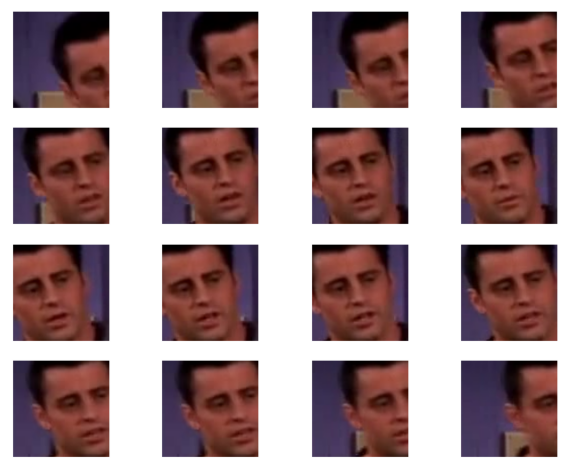

In [5]:
print(f'Printing out batch N1, emotion: {id2label[int(batch[1][0])]}')
ts.show(np.transpose(batch[0], (0, 2, 3, 4, 1))[0])

(16, 230, 230, 3)


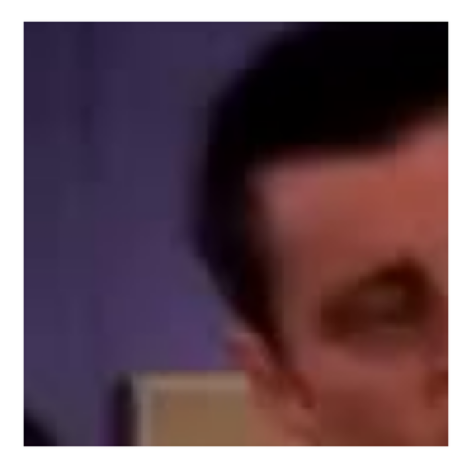

In [7]:
ani = ts.show_video(np.transpose(batch[0], (0, 2, 3, 4, 1))[0])

In [8]:
print('Animating batch images')
HTML(ani.to_jshtml())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


Animating batch images


## Анализируем ошибки модели

In [ ]:
import torch

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from utils import load_pretrained_model
from train import test_for_eval

In [ ]:
MODEL_NAME = ''
device = 'cuda'
        
layers = int(re.match(r'r3d(\d+)', MODEL_NAME).group(1))
dict_num_classes = {'K': 700, 'KM': 1039, 'KMS': 1139, 'KS': 800, 'M': 339, 'S': 100, 'MS': 439}
num_classes = dict_num_classes[re.match(r'r3d\d+_(\w+)_', MODEL_NAME).group(1)]

model = load_pretrained_model(layers, num_classes, device, 'saving_models/' + MODEL_NAME)

In [ ]:
f1score, y_true, y_predicted = test_for_eval(model, test_dataloader, device)

In [ ]:
labels = sorted(label2id.keys())
cm = confusion_matrix(y_true, y_predicted, normalize='true')

In [10]:
sns.heatmap(cm, annot=True, xticklabels=sorted(labels), yticklabels=sorted(labels))
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title(f'Матрица ошибок для видео-модели {MODEL_NAME}. F1 мера: {f1score}')
plt.show()

['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']